In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(1, '/Users/chris/Documents/PhD/ProjectSigma/GalaxyTools')

from HM2SM import halo_mass_to_stellar_mass
from VelocityDispersionLibrary import FullVelocityDispersion, SigmaLOS
from Bernardi import bernardi_sigma 

In [2]:
##############
Halo_mass = 13
##############

length = 100

dm_array = np.ones(length) * Halo_mass

stellar_mass = 11.086 # halo_mass_to_stellar_mass(Halo_mass, 0.0)
sm_array = np.ones(length) * stellar_mass
print("Stellar Mass:", stellar_mass, "solar masses")

'''
def sizes_ric_nat(sm):
    return (10**-0.314) * ((10*sm)*0.042) * (1 + (10**sm)/(10**10.537))**0.76
'''

size = 3.2 # sizes_ric_nat(stellar_mass)
r_array = np.ones(length) * size
print("Size:", size, "kpc")

n = 3.12
n_array = np.ones(length) * n

anisotropy = 0.0000001
beta = np.ones(length) * anisotropy

aperture = np.linspace(0.1, 10, length)

sigmas = []

dm_names = ["None", "NFW", "Burkert"]

for i, dm_name in enumerate(dm_names):
    Sigma = FullVelocityDispersion(aperture, beta, r_array, n_array, sm_array, 0, DM = dm_name,
                                   HaloMass = dm_array, cpath = "/Users/chris/Documents/PhD/ProjectSigma/data/cM_planck18.txt" )
    sigmas.append(Sigma)
    
b_sigma = bernardi_sigma(aperture, r_array, n_array, 10**sm_array)

print(sigmas)

Stellar Mass: 11.086 solar masses
Size: 3.2 kpc
[array([156.49548, 165.31061, 169.12305, 171.0325 , 171.99544, 172.42337,
       172.58978, 172.50865, 172.29173, 171.98451, 171.61705, 171.20998,
       170.80444, 170.36404, 169.91638, 169.46692, 169.01955, 168.57712,
       168.14177, 167.71504, 167.29807, 166.89153, 166.50624, 166.12407,
       165.75359, 165.39482, 165.0478 , 164.71242, 164.38858, 164.07608,
       163.77473, 163.48439, 163.20477, 162.93567, 162.67679, 162.4279 ,
       162.18877, 161.95917, 161.74158, 161.53079, 161.3288 , 161.13538,
       160.95026, 160.77327, 160.60417, 160.44272, 160.28876, 160.14204,
       160.00241, 159.86966, 159.7436 , 159.62407, 159.5109 , 159.40388,
       159.30292, 159.2078 , 159.11836, 159.03452, 158.95607, 158.88293,
       158.81494, 158.75197, 158.69333, 158.64018, 158.59172, 158.54776,
       158.50829, 158.47316, 158.44225, 158.41547, 158.39273, 158.37393,
       158.35901, 158.34784, 158.34035, 158.33644, 158.33607, 158.33916,
  

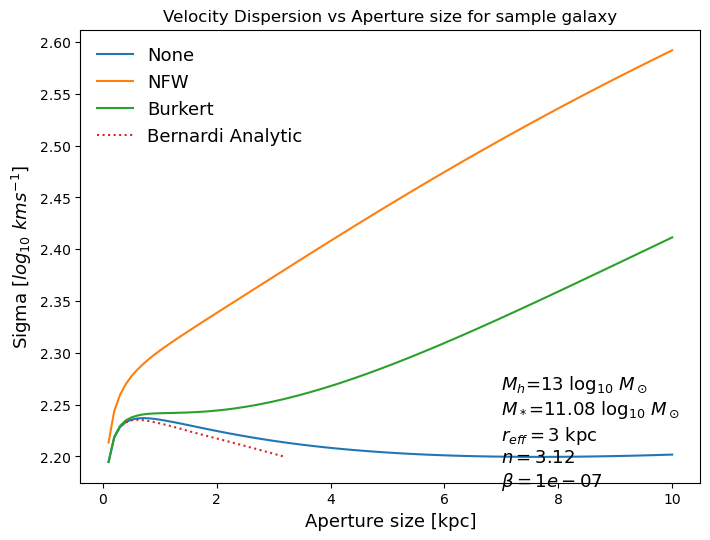

In [3]:
plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

for i, dm_name in enumerate(dm_names):  
    plt.plot(aperture, np.log10(sigmas[i]), label = dm_name)
    
plt.plot(aperture, np.log10(b_sigma), ":" , label = "Bernardi Analytic" ) 

plt.title(r"Velocity Dispersion vs Aperture size for sample galaxy")

font = 13

textstr = '\n'.join((
    r'$M_h$=%s $\log_{10}$ $M_\odot$' % (Halo_mass, ),
    r'$M_*$=%.5s $\log_{10}$ $M_\odot$' % (stellar_mass, ),
    r'$r_{eff}=%.1s$ kpc' % (size, ),
    r'$n = %s$' % (n, ),
    r'$\beta = %s$' % (anisotropy, ),
    ))

plt.text(7, 2.28, textstr, fontsize=font, verticalalignment='top')

plt.xlabel("Aperture size [kpc]", fontsize = font)
plt.legend(frameon=False, fontsize = font)
plt.ylabel(r"Sigma [$log_{10}$ $kms^{-1}$]", fontsize = font)
plt.savefig("./plots/sigmavsaperture.png")
plt.show()

### Sigma_LOS(r)

In [4]:
R_range = np.linspace(0.1, 100*size, length)

sigmas = []

dm_names = ["None", "NFW", "Burkert"]

for i, dm_name in enumerate(dm_names):
    Sigma = SigmaLOS(R_range, beta, r_array, n_array, sm_array, 0, DM = dm_name,
                                   HaloMass = dm_array, cpath = "/Users/chris/Documents/PhD/ProjectSigma/data/cM_planck18.txt" )
    sigmas.append(Sigma)
    
print(sigmas)

[array([1.65320267e+02, 1.30499329e+02, 1.04336708e+02, 8.85291367e+01,
       1.48111247e-02, 7.24910945e-03, 3.90480668e-03, 2.25507631e-03,
       1.37354608e-03, 8.72696983e-04, 5.73897967e-04, 3.88387503e-04,
       2.69317097e-04, 1.90702529e-04, 1.37521201e-04, 1.00775309e-04,
       7.49080718e-05, 5.63951107e-05, 4.29482534e-05, 3.30500334e-05,
       2.56754993e-05, 2.01205839e-05, 1.58939401e-05, 1.26480973e-05,
       1.01341448e-05, 8.17159798e-06, 6.62827006e-06, 5.40626661e-06,
       4.43249155e-06, 3.65186861e-06, 3.02257490e-06, 2.51258393e-06,
       2.09720861e-06, 1.75730906e-06, 1.47792139e-06, 1.24730161e-06,
       1.05617960e-06, 8.97180485e-07, 7.64425920e-07, 6.53200061e-07,
       5.59699799e-07, 4.80857125e-07, 4.14167232e-07, 3.57598225e-07,
       3.09478082e-07, 2.68435969e-07, 2.33340387e-07, 2.03256974e-07,
       1.77407713e-07, 1.55146623e-07, 1.35932325e-07, 1.19313199e-07,
       1.04909191e-07, 9.24002492e-08, 8.15159567e-08, 7.20275040e-08,
     

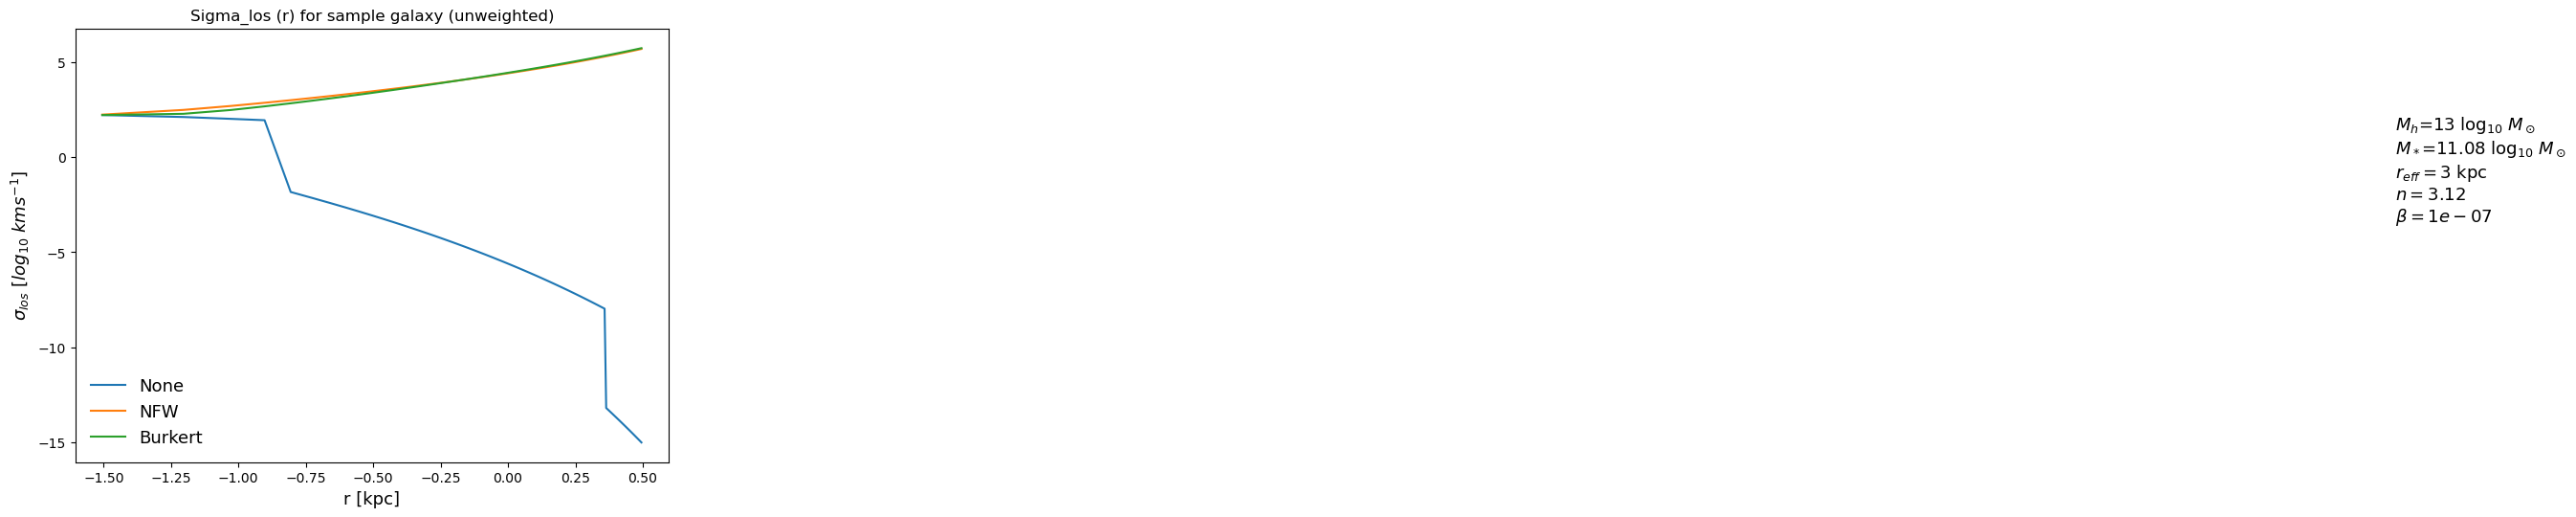

In [5]:
plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

for i, dm_name in enumerate(dm_names):  
    plt.plot(np.log10(aperture/size), np.log10(sigmas[i]), label = dm_name)
    

plt.title(r"Sigma_los (r) for sample galaxy (unweighted)")

font = 13

textstr = '\n'.join((
    r'$M_h$=%s $\log_{10}$ $M_\odot$' % (Halo_mass, ),
    r'$M_*$=%.5s $\log_{10}$ $M_\odot$' % (stellar_mass, ),
    r'$r_{eff}=%.1s$ kpc' % (size, ),
    r'$n = %s$' % (n, ),
    r'$\beta = %s$' % (anisotropy, ),
    ))

plt.text(7, 2.28, textstr, fontsize=font, verticalalignment='top')

plt.xlabel("r [kpc]", fontsize = font)
plt.legend(frameon=False, fontsize = font)
plt.ylabel(r"$\sigma_{los}$ [$log_{10}$ $kms^{-1}$]", fontsize = font)
plt.savefig("./plots/sigma(r).png")
plt.show()